### Figure 4

In [1]:
%run IMP.ipynb

#### Input Data

In [2]:
YS = (2110+40)
YE = (2110+40)+10

dens_mean,dens_anom = calc_input_IB3('POT_RHO_2_IB',YS,YE)
salt_mean,salt_anom = calc_input_IB3('SALT_IB',YS,YE)
temp_mean,temp_anom = calc_input_IB3('TEMP_IB',YS,YE)
age_mean ,age_anom  = calc_input_IB3('AGE_GLOBAL_IB',YS,YE)

dep,lat = salt_mean.dep,salt_mean.lat

#### Plot

In [3]:
subtitles_mean = ['CTRL','Wind$+$Thermal$+$Meltwater','Wind$+$Thermal','Meltwater Component']
subtitles_anom = ['Wind$+$Thermal$+$Meltwater','Wind$+$Thermal','Meltwater Component']
LABELS = ['SALINITY','SALINITY','SALINITY','TEMPERATURE','TEMPERATURE','TEMPERATURE','AGE','AGE','AGE']
x_label = 'Latitude from 1000-m isobath'

In [4]:
levs_dens_mean = clev_dens = np.arange(36.82+0.03*3,37.2+0.001,0.03)
levs_salt_mean = np.arange(34.60,34.75+0.001,0.01)
levs_temp_mean = np.arange(-1,1.01,0.1)*2
levs_age_mean  = np.arange(0,240+1,15)

levs_salt_anom_wthp  = np.arange(-1,1.01,0.1)*0.04/4.
levs_salt_anom_wthmp = np.arange(-1,1.01,0.1)*0.04
levs_temp_anom_wthp  = np.arange(-1,1.01,0.1)*0.8/4.
levs_temp_anom_wthmp = np.arange(-1,1.01,0.1)*0.8
levs_age_anom_wthp  = np.arange(0,40.01,4)/4.
levs_age_anom_wthmp = np.arange(0,40.01,4)

In [5]:
def make_plot9():
    ''''''
    ncol,nrow = 3,3
    
    manual_locations = [(200,2500),(250,4000)]
    rotation = [-30,-30,-10]
    JJ = [0,2,3]
    
    yy = [5000,dep[0]]
    y_ticks,y_ticklabels = cal_dep_label()
    
    subtitles = ['CTRL','Wind$+$Thermal','Meltwater Component']
    labels = ['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)','m)','n)','o)','q)','r)','s)']
    ''''''
    fig,ax = plt.subplots(nrow,ncol,figsize=(4*ncol,4*nrow))
    plt.subplots_adjust(wspace=0.06,hspace=0.06)
    kk=0
    for ii in np.arange(0,nrow,1):
        for jj in np.arange(0,ncol,1):
            ax = plt.subplot(nrow,ncol,kk+1)
            ax.set_facecolor('silver')
            #
            c1 = plt.contour(lat,dep,dens_mean[JJ[jj],:,:],levels=clev_dens[0:dd+1],colors='black',linestyles='-',linewidths=0.5,zorder=5)
            c2 = plt.contour(lat,dep,dens_mean[JJ[jj],:,:],levels=clev_dens[dd+1:],colors='black',linestyles='-',linewidths=1.0,zorder=5)
            labels2 = plt.clabel(c2,fontsize=9,inline=1,fmt='%2.2f',levels=clev_dens[dd+1+3:],manual=manual_locations)
            for l in labels2:
                l.set_rotation(rotation[jj])
            if ii==0 and jj==0:
                p1 = plt.contourf(lat,dep,salt_mean[0,:,:],levels=levs_salt_mean,cmap=colormap_salt_mean,zorder=0,extend='both')
            elif ii==0 and jj==1:
                q1 = plt.contourf(lat,dep,salt_anom[1,:,:],levels=levs_salt_anom_wthp,cmap=colormap_salt_anom,zorder=0,extend='both')
            elif ii==0 and jj==2:
                r1 = plt.contourf(lat,dep,salt_anom[2,:,:],levels=levs_salt_anom_wthmp,cmap=colormap_salt_anom,zorder=0,extend='both')
            #
            elif ii==1 and jj==0:
                p2 = plt.contourf(lat,dep,temp_mean[0,:,:],levels=levs_temp_mean,cmap=colormap_temp_mean,zorder=0,extend='both')
            elif ii==1 and jj==1:
                q2 = plt.contourf(lat,dep,temp_anom[1,:,:],levels=levs_temp_anom_wthp,cmap=colormap_temp_anom,zorder=0,extend='both')
            elif ii==1 and jj==2:
                r2 = plt.contourf(lat,dep,temp_anom[2,:,:],levels=levs_temp_anom_wthmp,cmap=colormap_temp_anom,zorder=0,extend='both')
            #
            elif ii==2 and jj==0:
                p3 = plt.contourf(lat,dep,age_mean[0,:,:],levels=levs_age_mean,cmap=colormap_age_mean,zorder=0,extend='both')
            elif ii==2 and jj==1:
                q3 = plt.contourf(lat,dep,age_anom[1,:,:],levels=levs_age_anom_wthp,cmap=colormap_age_anom,zorder=0,extend='both')
            elif ii==2 and jj==2:
                r3 = plt.contourf(lat,dep,age_anom[2,:,:],levels=levs_age_anom_wthmp,cmap=colormap_age_anom,zorder=0,extend='both')
                
            if ii==0:
                ax.set_title(subtitles[jj],fontsize=14,loc='center',y=1.02)
            ax.set_title(labels[kk]+' '+LABELS[kk],fontsize=13,loc='left',x=0.015,y=0.005)
            kk=kk+1
            
            plt.gca().invert_yaxis()
            plt.xlim(xx)
            plt.ylim(yy)
            plt.xticks(x_ticks,x_ticklabels)
            plt.yticks(y_ticks,y_ticklabels)
            plt.xlabel(x_label,fontsize=10,labelpad=5)
            plt.ylabel('Depth [km]',fontsize=10,labelpad=5)
            plt.tick_params(labelsize=9,direction='out',length=5)
            
    for ax in fig.get_axes():
        ax.label_outer()
        
    # Plot a colorbar
    cax1 = plt.axes([0.146,0.680,0.012,0.16])
    cax2 = plt.axes([0.146,0.423,0.012,0.16])
    cax3 = plt.axes([0.146,0.167,0.012,0.16])
    cax4 = plt.axes([0.41,0.680,0.012,0.16])
    cax5 = plt.axes([0.41,0.423,0.012,0.16])
    cax6 = plt.axes([0.41,0.167,0.012,0.16])
    cax7 = plt.axes([0.672,0.680,0.012,0.16])
    cax8 = plt.axes([0.672,0.423,0.012,0.16])
    cax9 = plt.axes([0.672,0.167,0.012,0.16])
    
    cb1 = plt.colorbar(p1,cax=cax1,orientation='vertical',ticks=levs_salt_mean[::3])
    cb2 = plt.colorbar(p2,cax=cax2,orientation='vertical',ticks=levs_temp_mean[::5])
    cb3 = plt.colorbar(p3,cax=cax3,orientation='vertical',ticks=levs_age_mean[::4])
    cb4 = plt.colorbar(q1,cax=cax4,orientation='vertical',ticks=levs_salt_anom_wthp[::5])
    cb5 = plt.colorbar(q2,cax=cax5,orientation='vertical',ticks=levs_temp_anom_wthp[::5])
    cb6 = plt.colorbar(q3,cax=cax6,orientation='vertical',ticks=levs_age_anom_wthp[::2])
    cb7 = plt.colorbar(r1,cax=cax7,orientation='vertical',ticks=levs_salt_anom_wthmp[::5])
    cb8 = plt.colorbar(r2,cax=cax8,orientation='vertical',ticks=levs_temp_anom_wthmp[::5])
    cb9 = plt.colorbar(r3,cax=cax9,orientation='vertical',ticks=levs_age_anom_wthmp[::2])
    
    cb1.ax.tick_params(axis='y',direction='in',length=6,labelsize=9,pad=0)
    cb2.ax.tick_params(axis='y',direction='in',length=6,labelsize=9,pad=2)
    cb3.ax.tick_params(axis='y',direction='in',length=6,labelsize=9,pad=2)
    cb4.ax.tick_params(axis='y',direction='in',length=6,labelsize=9,pad=1)
    cb5.ax.tick_params(axis='y',direction='in',length=6,labelsize=9,pad=2)
    cb6.ax.tick_params(axis='y',direction='in',length=6,labelsize=9,pad=2)
    cb7.ax.tick_params(axis='y',direction='in',length=6,labelsize=9,pad=2)
    cb8.ax.tick_params(axis='y',direction='in',length=6,labelsize=9,pad=2)
    cb9.ax.tick_params(axis='y',direction='in',length=6,labelsize=9,pad=2)
    
    fs_cb = 10.5
    title_age = 'Age'
    cb1.ax.set_ylabel('Climatological '+title_salt+' ['+unit_salt+']',fontsize=fs_cb,labelpad=2)
    cb2.ax.set_ylabel('Climatological '+title_temp+' ['+unit_temp+']',fontsize=fs_cb,labelpad=2)
    cb3.ax.set_ylabel('Climatological '+title_age +' ['+unit_age+']' ,fontsize=fs_cb,labelpad=2)
    cb4.ax.set_ylabel(title_salt+' Anomaly ['+unit_salt+']',fontsize=fs_cb,labelpad=2)
    cb5.ax.set_ylabel(title_temp+' Anomaly ['+unit_temp+']',fontsize=fs_cb,labelpad=2)
    cb6.ax.set_ylabel(title_age +' Anomaly ['+unit_age+'] ',fontsize=fs_cb,labelpad=2)
    cb7.ax.set_ylabel(title_salt+' Anomaly ['+unit_salt+']',fontsize=fs_cb,labelpad=2)
    cb8.ax.set_ylabel(title_temp+' Anomaly ['+unit_temp+']',fontsize=fs_cb,labelpad=2)
    cb9.ax.set_ylabel(title_age +' Anomaly ['+unit_age+']' ,fontsize=fs_cb,labelpad=2)
    
    cax1.yaxis.set_label_position('left')
    cax2.yaxis.set_label_position('left')
    cax3.yaxis.set_label_position('left')
    cax4.yaxis.set_label_position('left')
    cax5.yaxis.set_label_position('left')
    cax6.yaxis.set_label_position('left')
    cax7.yaxis.set_label_position('left')
    cax8.yaxis.set_label_position('left')
    cax9.yaxis.set_label_position('left')

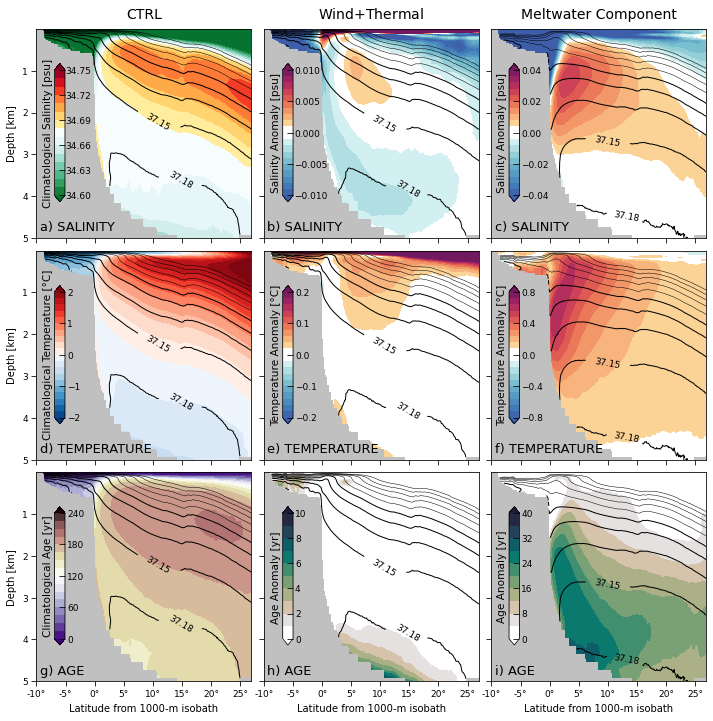

In [6]:
make_plot9()